In [55]:
import numpy as np

In [56]:
class SVM:
    def __init__(self, n_iters= 1000, learning_rate= 0.01, lambda_param= 0.01):
        self.iterations = n_iters
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.theta = None
        self.bias = None
    
    def fit(self, X, y):
        # making sure y is only -1 and 1, will be used in prediction
        y_ = np.where(y<=0, -1, 1)
        y_ = y_.reshape((y.shape[0], 1))
        n_samples, n_features = X.shape
        # initialising theta, and bias
        self.theta = np.random.random_sample((n_features, 1))
        self.bias = np.random.random_sample()

        for _ in range(self.iterations):
            for index, x_value in enumerate(X):
                x_value = x_value.reshape((1, X.shape[1]))

                # condition for classification
                condition = y_[index] * ((x_value @ self.theta) - self.bias) >= 1
                if condition:
                    d_theta = 2 * self.lambda_param * self.theta 
                    d_bias = 0
                    self.theta -= self.lr * d_theta
                    self.bias -= self.lr * d_bias
                else:
                    y_[index] = y_[index].reshape((1, 1))
                    d_theta = (2 * self.lambda_param * self.theta) - (x_value.T * y_[index])
                    d_bias = y_[index]
                    self.theta -= self.lr * d_theta
                    self.bias -= self.lr * d_bias 
    
    def predict(self, X):
        linear_output = X @ self.theta - self.bias
        linear_output = linear_output.reshape((X.shape[0], 1)) # we reshape our output according to testing data
        sign_matrix = np.sign(linear_output) # will give the sign as -1, 1, 0
        result = np.where(sign_matrix<=0, 0, 1).astype(np.float32) 
        # we convert -1 values to 0, since during training, they were converted to -1
        # and the model predicted based on that
        return result
    
    def accuracy(self, y_pred, y_test):
        return np.sum(y_pred == y_test)/ len(y_test)
    
    def _compute_loss(self, )

        

In [57]:
import pandas as pd
from scipy.io import loadmat

In [58]:
data5 = loadmat('data5.mat')
data = pd.DataFrame(data5['x']) 
data = data.sample(frac= 1, random_state= 3)

In [67]:
X = data.iloc[:, :72]
X = (X - X.mean(axis= 0)) / X.std(axis= 0)
y = data.iloc[:, 72]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(y_train.shape[0], 1)
y_test = y_test.to_numpy().reshape(y_test.shape[0], 1)

In [69]:
svm = SVM()
svm.fit(X_train, y_train)

In [70]:
predictions = svm.predict(X_test)

In [71]:
score = svm.accuracy(predictions, y_test)
score

0.8584729981378026

In [72]:
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [73]:
cm = metrics.confusion_matrix(y_test, predictions)

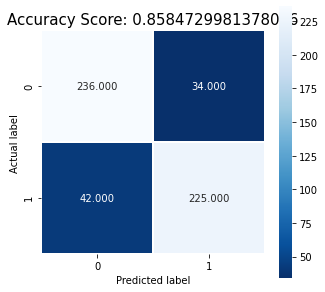

In [74]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()
#plt.savefig('Logistic confusion matrix')